# Erasmus Neural Networks
http://michalbereta.pl/nn
## One layer of perceptrons for multiclass classification problems


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### The example classification problem with three classes

We are going to use very simple classification problem with three classes, all of them linearly separable from each other.

Load the data from file `data_3classes_linear.txt`

The last column contains class labels, endoced as `0`, `1`, and `2`.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


data = np.loadtxt('data_3classes_linear.txt')
print('data=',data)

d = data[:,-1].astype('int')
X = data[:,:-1]

print()
print('X=',X)
print()
print('d=',d)

data= [[0.716 0.896 0.   ]
 [0.624 0.834 0.   ]
 [0.732 0.804 0.   ]
 [0.702 0.862 0.   ]
 [0.656 0.794 0.   ]
 [0.784 0.8   0.   ]
 [0.778 0.858 0.   ]
 [0.664 0.894 0.   ]
 [0.678 0.828 0.   ]
 [0.706 0.76  0.   ]
 [0.744 0.34  1.   ]
 [0.68  0.302 1.   ]
 [0.758 0.27  1.   ]
 [0.684 0.246 1.   ]
 [0.732 0.292 1.   ]
 [0.724 0.238 1.   ]
 [0.836 0.254 1.   ]
 [0.796 0.334 1.   ]
 [0.782 0.236 1.   ]
 [0.814 0.284 1.   ]
 [0.166 0.504 2.   ]
 [0.118 0.466 2.   ]
 [0.142 0.424 2.   ]
 [0.176 0.428 2.   ]
 [0.21  0.468 2.   ]
 [0.2   0.418 2.   ]
 [0.146 0.372 2.   ]
 [0.112 0.42  2.   ]
 [0.16  0.466 2.   ]
 [0.132 0.51  2.   ]]

X= [[0.716 0.896]
 [0.624 0.834]
 [0.732 0.804]
 [0.702 0.862]
 [0.656 0.794]
 [0.784 0.8  ]
 [0.778 0.858]
 [0.664 0.894]
 [0.678 0.828]
 [0.706 0.76 ]
 [0.744 0.34 ]
 [0.68  0.302]
 [0.758 0.27 ]
 [0.684 0.246]
 [0.732 0.292]
 [0.724 0.238]
 [0.836 0.254]
 [0.796 0.334]
 [0.782 0.236]
 [0.814 0.284]
 [0.166 0.504]
 [0.118 0.466]
 [0.142 0.424]
 [0.176 0.428]

### Data visualization

Check, that the classes can be separated with linear functions.

<IPython.core.display.Javascript object>


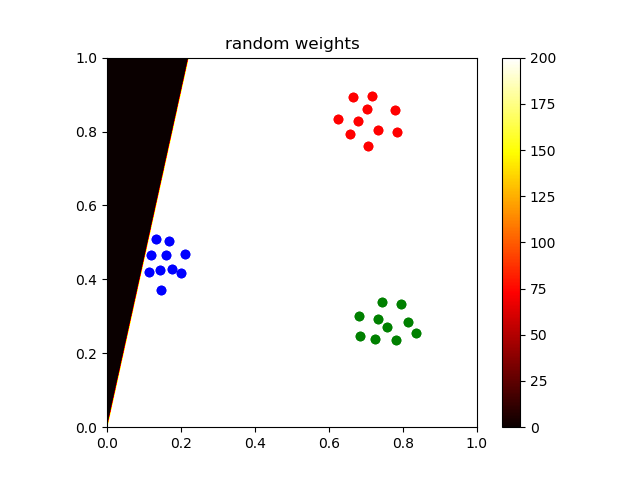

In [2]:
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')



### Combining perceptrons in a layer

Each perceptron is responsible for just one class. When making the clasification decision, we check for the strongest response from among the neurons.

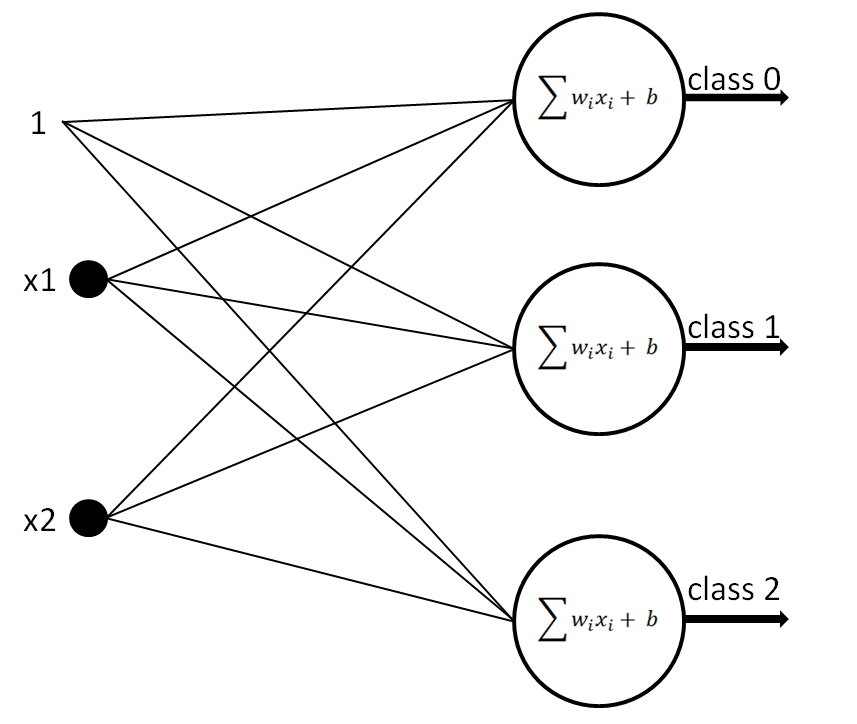

We will implement out layer of perceptrons as a class in Python.

All of the weights of all neurons are stored in one matrix, (one column for each neuron).

Biases are stored separately in a vector.

In [3]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None


#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

w= [[ 0.18018844 -0.88361225 -0.87078463]
 [-0.74853571 -0.93294356 -0.04143213]
 [-0.05233515  0.60473095 -0.17005677]
 [ 0.14258372  0.37702809 -0.1566072 ]
 [-0.72807591  0.6518112  -0.59249668]]
b= [0. 0. 0.]


### Forward pass

Let's add the possibility to calculate the response of the neurons.

In [4]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs


#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)    

#example random data with 10 examples
X = np.random.rand(10, num_of_ins)
print('X=',X)
Y = perc.Forward(X)
print('Y=',Y)

X= [[0.21414924 0.87050851 0.29810775 0.70131472 0.97472041]
 [0.68319978 0.97387587 0.92531878 0.9384685  0.33274965]
 [0.35768624 0.63124525 0.42059534 0.63602888 0.91045466]
 [0.80113655 0.13316733 0.38291404 0.09507145 0.22566893]
 [0.09688675 0.13784244 0.27530782 0.43321572 0.04411695]
 [0.66646469 0.25195516 0.60382967 0.70261508 0.2661898 ]
 [0.49076581 0.88345269 0.72424791 0.64737976 0.65337868]
 [0.63970993 0.40766877 0.51623947 0.89535314 0.13816551]
 [0.8722693  0.41357132 0.13081843 0.40665679 0.13588826]
 [0.58775978 0.35210495 0.44943992 0.42004448 0.86488787]]
Y= [[-0.70153562 -0.04111325 -1.01341975]
 [-0.07765554 -0.83442316 -0.21955453]
 [-0.38525377 -0.09948276 -0.57024144]
 [ 0.640937   -0.21259486  0.78697057]
 [-0.13316354 -0.19724413 -0.15954324]
 [ 0.19888578 -0.34334818  0.25646826]
 [-0.18121761 -0.56799    -0.35984883]
 [-0.01185725 -0.32183761 -0.02391279]
 [ 0.30012372 -0.01771553  0.3259231 ]
 [ 0.06154121 -0.06511195  0.03245567]]


### Making predictions about the classes

Matrix `Y` contains in each row the responses of the neurons for a given example (row in `X`).

To make the classification decision, we have to select in each row, which column indicates the strongest response (biggest value).

In [5]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)

#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)    

#example random data with 10 examples
X = np.random.rand(10, num_of_ins)
print('X=',X)
Y = perc.Forward(X)
print('Y=',Y)

predicted_classes = perc.GetPredictions()
print('predicted_classes',predicted_classes)

X= [[0.46847958 0.90655593 0.68401175 0.32895924 0.58410609]
 [0.9057436  0.10075787 0.91611799 0.71843715 0.72299003]
 [0.68706727 0.16899465 0.74257826 0.5304706  0.21625257]
 [0.80115313 0.94395107 0.41133783 0.19141332 0.42353067]
 [0.03441443 0.59968824 0.84137647 0.71081573 0.60183058]
 [0.15532147 0.09702493 0.07178896 0.89752196 0.30340351]
 [0.1910276  0.7717697  0.83165802 0.0458821  0.96267801]
 [0.9255528  0.06678467 0.04715009 0.31312055 0.03611217]
 [0.94880308 0.48317389 0.72494834 0.15540178 0.90985633]
 [0.99101579 0.4857701  0.85287901 0.20512396 0.83666454]]
Y= [[-1.16450005 -0.14419156 -0.12532943]
 [-0.15802658  0.40230366  0.41189143]
 [-0.02434315  0.33710471  0.45785183]
 [-0.72570347  0.24014102 -0.33719841]
 [-1.02992532 -0.44339552  0.38616497]
 [ 0.54739571  0.13395558  0.45775193]
 [-1.89222692 -0.51701566 -0.35259655]
 [ 0.7956177   0.80564866  0.06053202]
 [-0.89656192  0.28185428 -0.31297578]
 [-0.89245105  0.30009865 -0.18731785]]
predicted_classes [2 2

### Measuring the MSE and classification error

We can measure both, MSE (mean squared error) and the classification error.

In [6]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())

### Getting ready for training

We can implement both, matrix pseudo-inverse and iterative version of the MSE minimization.

In [7]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        pass
    def TrainIterative(self, X, d, labels, eta, max_iters): #iterative; we pass 'labels' just to monitor the clasification error during training
        pass

### Encoding class labels as `1` and `-1`

Each perceptron is trained against all others. For that, each neruon should have its own column of required output values for the examples. They could be just `1` for examples from the class represented by the given neuron, and `-1` for examples from all other classes.

Check the following helper function.

In [8]:
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

X = np.loadtxt('data_3classes_linear.txt')
d = X[:,-1].astype('int')
X = X[:,:-1]

num_of_cls = len(set(d))
print('d=',d)
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain=',dtrain)

d= [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
dtrain= [[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]]


### Initial responses and errors

Let's create neurons with random weights and check the errors.

In [9]:
num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

perc = MCPerceptron(num_of_cls, num_of_ins)
print('Initial weights:')
print('w=',perc.w)
print('b=',perc.b)

Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))

num_of_cls= 3
num_of_ins= 2
Initial weights:
w= [[ 0.1020805  -0.11086003  0.14673147]
 [ 0.99976751  0.22239113  0.7812388 ]]
b= [0. 0. 0.]
Y= [[ 0.96888133  0.11988667  0.8050497 ]
 [ 0.89750434  0.11629754  0.7431136 ]
 [ 0.87853601  0.09765293  0.73552343]
 [ 0.93346011  0.11387741  0.77643334]
 [ 0.86078021  0.10385438  0.71655945]
 [ 0.87984512  0.09099864  0.74002851]
 [ 0.93721915  0.10456249  0.78445997]
 [ 0.96157361  0.12520661  0.79585718]
 [ 0.89701808  0.10897676  0.74634966]
 [ 0.83189214  0.09075008  0.69733391]
 [ 0.41586885 -0.00686688  0.37478941]
 [ 0.37134453 -0.0082227   0.33571152]
 [ 0.34731425 -0.0239863   0.32215693]
 [ 0.31576587 -0.02112004  0.29254907]
 [ 0.36665504 -0.01621133  0.33552917]
 [ 0.31185095 -0.02733357  0.29216842]
 [ 0.33928025 -0.03619164  0.32110216]
 [ 0.41517843 -0.01396594  0.37773201]
 [ 0.31577208 -0.03420824  0.29911637]
 [ 0.3670275  -0.02708098  0.34131124]
 [ 0.52082819  0.09368236  0.41810178]
 [ 0.47793716  0.09055278  0.38137159

### Training with matrix pseudo-inverse

In [10]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X)) #add te column wit '1's
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainIterative(self, X, d, labels, eta, max_iters):
        pass


perc = MCPerceptron(num_of_cls, num_of_ins) #create new perceptron, as the class definition changed    
perc.Train(X, dtrain)

#checking the responses after training
Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

Y= [[ 1.20532085 -1.15703431 -1.04828654]
 [ 0.88706798 -1.16612664 -0.72094134]
 [ 0.88992947 -0.81801923 -1.07191023]
 [ 1.06828365 -1.07777068 -0.99051297]
 [ 0.77569719 -0.96084638 -0.81485081]
 [ 0.92898062 -0.68470092 -1.2442797 ]
 [ 1.13201754 -0.88898173 -1.24303581]
 [ 1.14462753 -1.27065471 -0.87397282]
 [ 0.92096197 -1.0216198  -0.89934217]
 [ 0.70448062 -0.73366106 -0.97081956]
 [-0.77139     0.73302132 -0.96163132]
 [-0.97427768  0.70985308 -0.7355754 ]
 [-1.00948367  0.99518817 -0.9857045 ]
 [-1.17215744  0.90294537 -0.73078793]
 [-0.95686869  0.86286931 -0.90600061]
 [-1.15987577  1.02166031 -0.86178454]
 [-0.98697722  1.22799549 -1.24101827]
 [-0.7395529   0.8729056  -1.1333527 ]
 [-1.10743987  1.16228031 -1.05484043]
 [-0.90139223  1.07865785 -1.17726562]
 [-0.77428005 -1.141306    0.91558605]
 [-0.96071258 -1.12749382  1.0882064 ]
 [-1.087525   -0.9341378   1.0216628 ]
 [-1.03812968 -0.86868635  0.90681603]
 [-0.85888136 -0.92142237  0.78030373]
 [-1.04951722 -0.78038

### Full code with vizualization

X= [[0.716 0.896]
 [0.624 0.834]
 [0.732 0.804]
 [0.702 0.862]
 [0.656 0.794]
 [0.784 0.8  ]
 [0.778 0.858]
 [0.664 0.894]
 [0.678 0.828]
 [0.706 0.76 ]
 [0.744 0.34 ]
 [0.68  0.302]
 [0.758 0.27 ]
 [0.684 0.246]
 [0.732 0.292]
 [0.724 0.238]
 [0.836 0.254]
 [0.796 0.334]
 [0.782 0.236]
 [0.814 0.284]
 [0.166 0.504]
 [0.118 0.466]
 [0.142 0.424]
 [0.176 0.428]
 [0.21  0.468]
 [0.2   0.418]
 [0.146 0.372]
 [0.112 0.42 ]
 [0.16  0.466]
 [0.132 0.51 ]]
d= [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
num_of_cls= 3
num_of_ins= 2
dtrain= [[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1. 

<IPython.core.display.Javascript object>


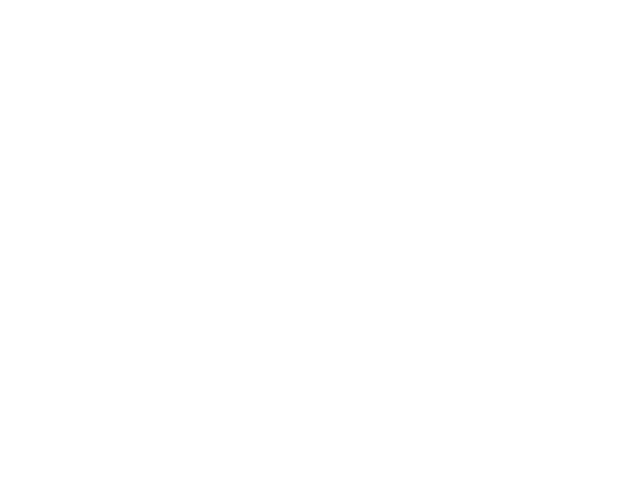

Y= [[ 1.20532085 -1.15703431 -1.04828654]
 [ 0.88706798 -1.16612664 -0.72094134]
 [ 0.88992947 -0.81801923 -1.07191023]
 [ 1.06828365 -1.07777068 -0.99051297]
 [ 0.77569719 -0.96084638 -0.81485081]
 [ 0.92898062 -0.68470092 -1.2442797 ]
 [ 1.13201754 -0.88898173 -1.24303581]
 [ 1.14462753 -1.27065471 -0.87397282]
 [ 0.92096197 -1.0216198  -0.89934217]
 [ 0.70448062 -0.73366106 -0.97081956]
 [-0.77139     0.73302132 -0.96163132]
 [-0.97427768  0.70985308 -0.7355754 ]
 [-1.00948367  0.99518817 -0.9857045 ]
 [-1.17215744  0.90294537 -0.73078793]
 [-0.95686869  0.86286931 -0.90600061]
 [-1.15987577  1.02166031 -0.86178454]
 [-0.98697722  1.22799549 -1.24101827]
 [-0.7395529   0.8729056  -1.1333527 ]
 [-1.10743987  1.16228031 -1.05484043]
 [-0.90139223  1.07865785 -1.17726562]
 [-0.77428005 -1.141306    0.91558605]
 [-0.96071258 -1.12749382  1.0882064 ]
 [-1.087525   -0.9341378   1.0216628 ]
 [-1.03812968 -0.86868635  0.90681603]
 [-0.85888136 -0.92142237  0.78030373]
 [-1.04951722 -0.78038

<IPython.core.display.Javascript object>


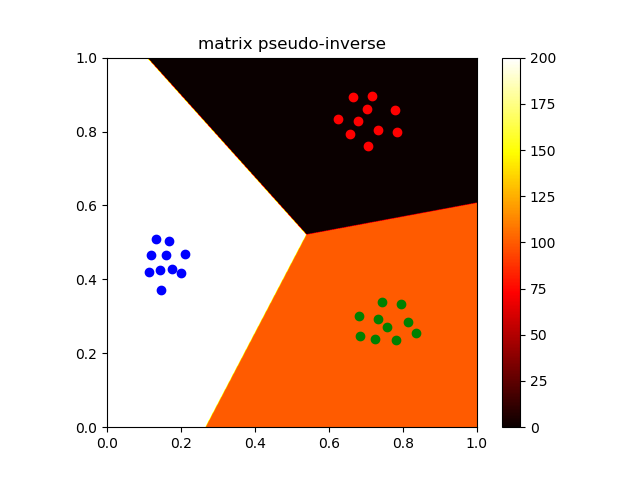

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

##########################################################################
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainIterative(self, X, d, labels, eta, max_iters):
        pass
##########################################################################
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

##########################################################################
#load data
##########################################################################
X = np.loadtxt('data_3classes_linear.txt')
#print('X=',X)
d = X[:,-1].astype('int')
X = X[:,:-1]
print('X=',X)
print('d=',d)

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

##########################################################################
#encode classes
##########################################################################
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain=',dtrain)

##########################################################################
#create perceptron
##########################################################################
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#check initial responses and errors
##########################################################################
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))


##########################################################################
#vizualization of the initial responses
##########################################################################
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

Z0 = _X*perc.w[0,0] + _Y*perc.w[1,0] + perc.b[0]
Z1 = _X*perc.w[0,1] + _Y*perc.w[1,1] + perc.b[1]
Z2 = _X*perc.w[0,2] + _Y*perc.w[1,2] + perc.b[2]
Z = Z0.copy()
Z[(Z0>Z1) * (Z0>Z2)] = 0
Z[(Z1>Z0) * (Z1>Z2)] = 100
Z[(Z2>Z0) * (Z2>Z1)] = 200

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('random weights')
plt.show()


##########################################################################
#training
##########################################################################
plt.figure()
perc.Train(X, dtrain)

Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#vizualization of the trained neurons
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

Z0 = _X*perc.w[0,0] + _Y*perc.w[1,0] + perc.b[0]
Z1 = _X*perc.w[0,1] + _Y*perc.w[1,1] + perc.b[1]
Z2 = _X*perc.w[0,2] + _Y*perc.w[1,2] + perc.b[2]
Z = Z0.copy()
Z[(Z0>Z1) * (Z0>Z2)] = 0
Z[(Z1>Z0) * (Z1>Z2)] = 100
Z[(Z2>Z0) * (Z2>Z1)] = 200

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('matrix pseudo-inverse')
plt.show()
##########################################################################

### Iterative learning

We can train our network iteratively, based on the negative gradient.

If `MSE` is defined as 

\begin{equation}
MSE = (d - Xw)^T(d-Xw)
\end{equation}

then, the gradient for `w` is

\begin{equation}
-2X^T(d-Xw)
\end{equation}

and the update formula for weights is 

\begin{equation}
w = w + \eta  X^T(d-Xw)
\end{equation}

Check the implementation below.

mse= 1.6398359145299195
classification_error= 16

mse= 1.546401316439702
classification_error= 10

mse= 1.4340057651635378
classification_error= 10

mse= 1.3557598679345861
classification_error= 3

mse= 1.257595429242546
classification_error= 5

mse= 1.1919736168691744
classification_error= 0

mse= 1.1061861891596847
classification_error= 0

mse= 1.0510361872208938
classification_error= 0

mse= 0.9760812043606361
classification_error= 0

mse= 0.9296103112582724
classification_error= 0

mse= 0.8641830887690392
classification_error= 0

mse= 0.8249094486043022
classification_error= 0

mse= 0.7678929557614601
classification_error= 0

mse= 0.7346010001550006
classification_error= 0

mse= 0.6850271257177998
classification_error= 0

mse= 0.656727004048752
classification_error= 0

mse= 0.6137482523259862
classification_error= 0

mse= 0.5896387413793144
classification_error= 0

mse= 0.5525079144654812
classification_error= 0

mse= 0.5319420865626134
classification_error= 0

mse= 0.4999977058374

<IPython.core.display.Javascript object>


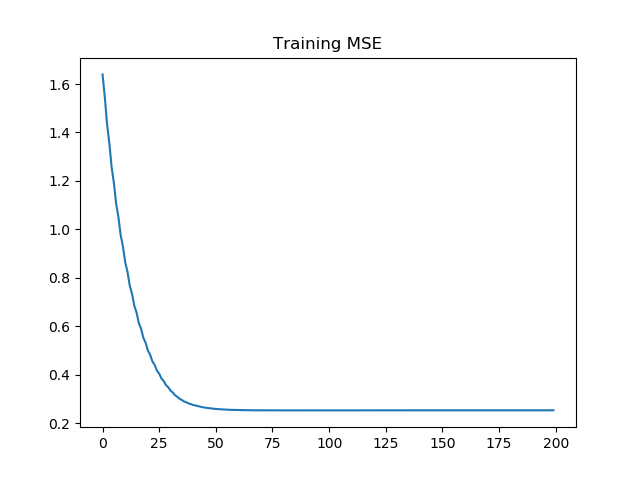

Text(0.5, 1.0, 'Training MSE')

In [12]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        print('w=',w)
        self.w = w[1:,:]
        self.b = w[0,:]
        print('w=',self.w)
        print('b=',self.b)
    def TrainIterative(self, X, d, labels, eta, max_iters):
        self.mse_stats = []
        Y = self.Forward(X)
        for i in range(max_iters):
            self.w += eta*np.dot(X.T, d - self.outs)
            self.b += eta*np.dot(np.ones((1,X.shape[0])), d - self.outs).flatten()
            Y = self.Forward(X)
            mse = self.GetMSE(d)
            self.mse_stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()
###########################################################################################################
perc2 = MCPerceptron(num_of_cls, num_of_ins)
perc2.TrainIterative(X, dtrain, d, 0.04, 200)
Y = perc2.Forward(X)
#print('Y=',Y)
predictions = perc2.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc2.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc2.w)
print('b=',perc2.b)
print()
print('Weights from matrix pseudo-inverse:') # just for comparison
print('w=',perc.w)
print('b=',perc.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

### Task 1

Train the proper percepton on the `iris` dataset.

- Endode the class labels correctly.

- Display the errors (MSE and classification error) before training and after the training. Comment on the results.

- Compare the matrix pseudo-inverse and iterative version.

- Try to tune the `eta` parameter of the iterative algorithm.

- Are the classes linearly separable (what you think? some of them?)

- What are the min/max values of the inputs? Try to normalize the data. Does it help?

Write your code and comments.

YOUR ANSWER HERE (COMMENTS)

#### Encode the class labels correctly.

In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

##########################################################################
#load data
##########################################################################
X = np.loadtxt('iris.csv', dtype = "float", delimiter=None, usecols=[0,1,2,3])
d = np.loadtxt('iris.csv', dtype = "U20", delimiter=None, usecols=[4])
#print('X=',X)
print('d =', d)

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

#print('num_of_cls=',num_of_cls)
#print('num_of_ins=',num_of_ins)

##########################################################################
for i in range(len(d)):
    if d[i]=='Iris-setosa':
        d[i] = 0
    elif d[i]=='Iris-versicolor':
        d[i] = 1
    elif d[i]=='Iris-virginica':
        d[i] = 2
        
d = d.astype(int)
print('d =', d)

##########################################################################
#encode classes
##########################################################################
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain =', dtrain)


d = ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

#### Display the errors (MSE and classification error) before training and after the training. Comment on the results.

In [14]:
##########################################################################
#create perceptron
##########################################################################
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#normalize
##########################################################################
min = X.min(axis=0)
max = X.max(axis=0)
X = X / X.max(axis=0)

##########################################################################
#check initial responses and errors
##########################################################################
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))

##########################################################################
#training
##########################################################################
perc.Train(X, dtrain)
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)


w= [[ 0.68337972  0.77157889  0.79300894]
 [ 0.86069135 -0.2167579  -0.19038959]
 [-0.47789209  0.0146716   0.26986228]
 [ 0.82404258  0.96045787 -0.212333  ]]
b= [0. 0. 0.]
Predictions= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
MSE= 2.6800149471440675
classification errors= 100
w= [[-0.75506092  2.12595385 -2.37089293]
 [ 1.0371602  -0.34040529 -0.69675492]
 [ 2.13376242 -3.87820892  1.74444649]
 [-3.07410698  3.0155949   0.05851209]
 [-0.31675706 -2.41595647  2.73271353]]
w= [[ 1.0371602  -0.34040529 -0.69675492]
 [ 2.13376242 -3.87820892  1.74444649]
 [-3.07410698  3.0155949   0.05851209]
 [-0.31675706 -2.41595647  2.73271353]]
b= [-0.75506092  2.12595385 -2.37089293]
Predictions= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#### Compare the matrix pseudo-inverse and iterative version.

mse= 1.8247390086292012
classification_error= 100

mse= 1.695136878761857
classification_error= 142

mse= 1.6057180332565364
classification_error= 110

mse= 1.5417361978947608
classification_error= 81

mse= 1.4926760916023571
classification_error= 68

mse= 1.4443073178280077
classification_error= 62

mse= 1.4055282820748025
classification_error= 59

mse= 1.366932732008977
classification_error= 48

mse= 1.3344875785795673
classification_error= 46

mse= 1.3034516153502151
classification_error= 44

mse= 1.2765011769513084
classification_error= 40

mse= 1.2514971304157925
classification_error= 41

mse= 1.2294210248322823
classification_error= 42

mse= 1.2093229188449266
classification_error= 43

mse= 1.1914705127717489
classification_error= 42

mse= 1.1754096267558085
classification_error= 42

mse= 1.1611407155906488
classification_error= 42

mse= 1.1484096435699944
classification_error= 42

mse= 1.1371289463911922
classification_error= 42

mse= 1.127127582898704
classification_error= 41



<IPython.core.display.Javascript object>


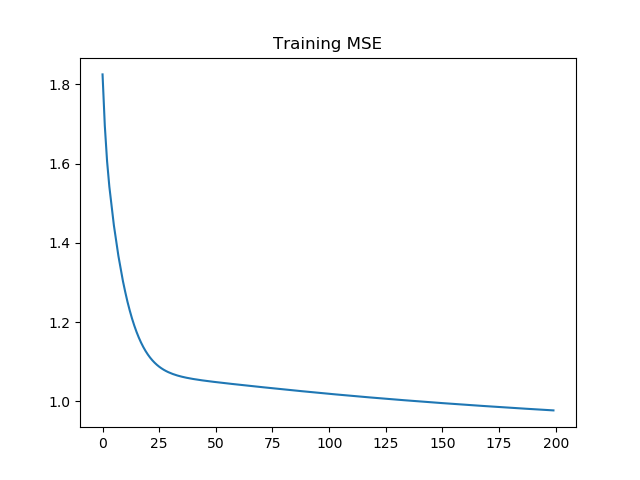

Text(0.5, 1.0, 'Training MSE')

In [15]:
##########################################################################
#training
##########################################################################
perc2 = MCPerceptron(num_of_cls, num_of_ins)
perc2.TrainIterative(X, dtrain, d, 0.004, 200)
Y = perc2.Forward(X)
#print('Y=',Y)
#print('X=',X)
predictions = perc2.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc2.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc2.w)
print('b=',perc2.b)
print()
print('Weights from matrix pseudo-inverse:') # just for comparison
print('w=',perc.w)
print('b=',perc.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

#### Try to tune the eta parameter of the iterative algorithm.

mse= 1.8004576513597708
classification_error= 104

mse= 1.7007028835191114
classification_error= 107

mse= 1.6275596099609384
classification_error= 117

mse= 1.5723754955752773
classification_error= 83

mse= 1.5206976839617614
classification_error= 68

mse= 1.4771937034022433
classification_error= 71

mse= 1.4359849736407628
classification_error= 62

mse= 1.399983924732766
classification_error= 59

mse= 1.3665372484703595
classification_error= 50

mse= 1.3368441261716566
classification_error= 50

mse= 1.309673428805649
classification_error= 49

mse= 1.2853941151698576
classification_error= 49

mse= 1.2633960284917838
classification_error= 50

mse= 1.2437104988697036
classification_error= 50

mse= 1.2259951963184763
classification_error= 50

mse= 1.2101610514043661
classification_error= 50

mse= 1.1959844559738413
classification_error= 50

mse= 1.1833429252788805
classification_error= 50

mse= 1.172070380016171
classification_error= 50

mse= 1.1620436130804785
classification_error= 50



mse= 0.9730075302960904
classification_error= 22

mse= 0.9726919625807194
classification_error= 22

mse= 0.9723778396067788
classification_error= 22

mse= 0.9720651648166406
classification_error= 22

mse= 0.9717539425591265
classification_error= 22

mse= 0.9714441781597306
classification_error= 22

mse= 0.9711358779904685
classification_error= 22

mse= 0.9708290495366689
classification_error= 22

mse= 0.9705237014570298
classification_error= 22

mse= 0.9702198436320943
classification_error= 22

mse= 0.9699174871949234
classification_error= 22

mse= 0.9696166445362273
classification_error= 22

mse= 0.9693173292746824
classification_error= 22

mse= 0.9690195561817492
classification_error= 22

mse= 0.9687233410493266
classification_error= 22

mse= 0.9684287004884
classification_error= 22

mse= 0.9681356516479612
classification_error= 22

mse= 0.9678442118463668
classification_error= 22

mse= 0.9675543981124894
classification_error= 22

mse= 0.967266226641667
classification_error= 22

mse=

classification_error= 21

mse= 0.9264625373020658
classification_error= 21

mse= 0.9263648912406317
classification_error= 21

mse= 0.926267681997441
classification_error= 21

mse= 0.9261709074257021
classification_error= 21

mse= 0.9260745653780297
classification_error= 21

mse= 0.9259786537069488
classification_error= 21

mse= 0.9258831702654065
classification_error= 21

mse= 0.9257881129072835
classification_error= 21

mse= 0.9256934794879095
classification_error= 21

mse= 0.9255992678645745
classification_error= 21

mse= 0.9255054758970402
classification_error= 21

mse= 0.9254121014480451
classification_error= 21

mse= 0.9253191423838044
classification_error= 21

mse= 0.9252265965745017
classification_error= 21

mse= 0.9251344618947714
classification_error= 21

mse= 0.9250427362241728
classification_error= 21

mse= 0.9249514174476506
classification_error= 21

mse= 0.9248605034559815
classification_error= 21

mse= 0.9247699921462125
classification_error= 21

mse= 0.924679881422079
cl

classification_error= 22

mse= 0.9109983956563991
classification_error= 22

mse= 0.9109653175967939
classification_error= 22

mse= 0.9109323682974146
classification_error= 22

mse= 0.9108995472158472
classification_error= 22

mse= 0.9108668538121287
classification_error= 22

mse= 0.9108342875487343
classification_error= 22

mse= 0.9108018478905642
classification_error= 22

mse= 0.9107695343049307
classification_error= 22

mse= 0.9107373462615457
classification_error= 22

mse= 0.9107052832325085
classification_error= 22

mse= 0.9106733446922918
classification_error= 22

mse= 0.9106415301177299
classification_error= 22

mse= 0.9106098389880072
classification_error= 22

mse= 0.9105782707846447
classification_error= 22

mse= 0.9105468249914882
classification_error= 22

mse= 0.9105155010946966
classification_error= 22

mse= 0.9104842985827293
classification_error= 22

mse= 0.9104532169463347
classification_error= 22

mse= 0.9104222556785385
classification_error= 22

mse= 0.9103914142746307


<IPython.core.display.Javascript object>


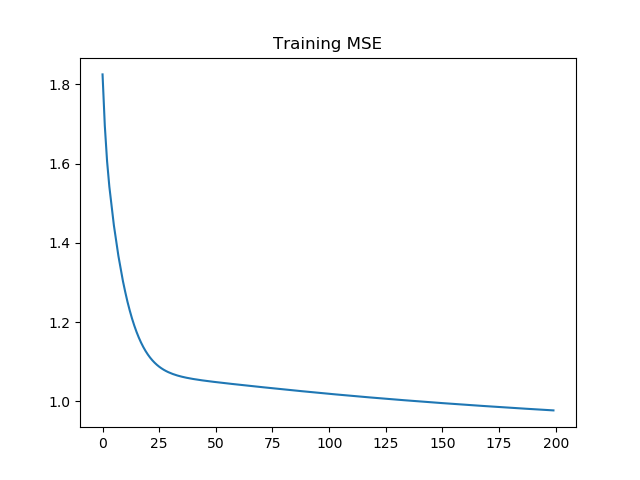

Text(0.5, 1.0, 'Training MSE')

In [16]:
##########################################################################
#training
##########################################################################
perc3 = MCPerceptron(num_of_cls, num_of_ins)
perc3.TrainIterative(X, dtrain, d, 0.004, 1000)
Y = perc3.Forward(X)
#print('Y=',Y)
predictions = perc3.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc3.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc3.w)
print('b=',perc3.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

#### Are the classes linearly separable (what you think? some of them?)

Watching the Prediction results we can see that Class 0 ("Iris-setosa") is linearly separable from the other ones, but Classes 1 and 2 ("Iris-versicolor" and "Iris-virginica") are not linearly separable (they are mixed).

#### What are the min/max values of the inputs? Try to normalize the data. Does it help?

In [17]:
min_norm = X.min(axis=0)
max_norm = X.max(axis=0)

print("BEFORE NORMALIZATION")
print("The minimum and maximum values (for every row) are:")
print("min =", min)
print("max =", max)

print()

print("AFTER NORMALIZATION")
print("The minimum and maximum values (for every row) are:")
print("min (normalized) =", min_norm)
print("max (normalized) =", max_norm)


BEFORE NORMALIZATION
The minimum and maximum values (for every row) are:
min = [4.3 2.  1.  0.1]
max = [7.9 4.4 6.9 2.5]

AFTER NORMALIZATION
The minimum and maximum values (for every row) are:
min (normalized) = [0.5443038  0.45454545 0.14492754 0.04      ]
max (normalized) = [1. 1. 1. 1.]


When testing we can observe that without normalizing the data, the update rule behaves incorrectly and we get strange results.